### Use the sklearn iris dataset to predict the Iris flower type using SVM
- Change tuning parameters to find what range of values works best for SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris_df =  pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df['flower_name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df0 = iris_df[iris_df.target == 0]
df1 = iris_df[iris_df.target == 1]
df2 = iris_df[iris_df.target == 2]

In [7]:
from matplotlib import pyplot as plot
%matplotlib inline

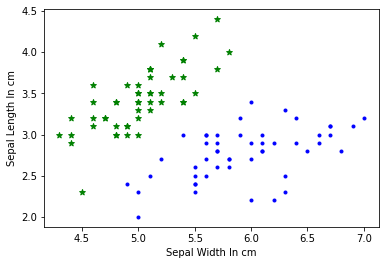

In [8]:
plot.xlabel('Sepal Width In cm')
plot.ylabel('Sepal Length In cm')
plot.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color = 'green', marker = '*')
plot.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color = 'blue', marker = '.')

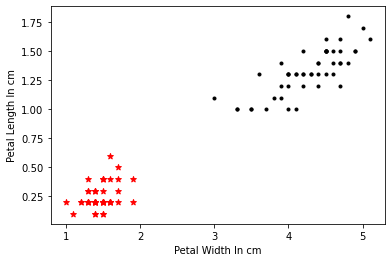

In [9]:
plot.xlabel('Petal Width In cm')
plot.ylabel('Petal Length In cm')
plot.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color = 'red', marker = '*')
plot.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color = 'black', marker = '.')

In [10]:
### Drop columns before training : {target, flower_name}
X = iris_df.drop(columns = ['target', 'flower_name'], axis= 'columns')
Y = iris_df.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

In [13]:
from sklearn.svm import SVC

In [20]:
# can set tuning parameter
#C : float, default=1.0 .Regularization parameter. The strength of the regularization is inversely proportional to C
# kernel='rbf', 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'. Default is rbf.
#gamma='scale' .{'scale', 'auto'} or float, default='scale'. Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
# - if ``gamma='scale'`` (default) is passed then it uses
# 1 / (n_features * X.var()) as value of gamma,
# - if 'auto', uses 1 / n_features.
model =  SVC()

In [15]:
model.fit(X_train,y_train)

SVC()

In [16]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 1, 2, 1, 0])

In [17]:
model.score(X_test,y_test)

0.9

In [18]:
model

SVC()

In [19]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}